# Self-Avoiding Walk in Two Dimensions

In [1]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 18})

In [2]:
# import custom class
%run -i '../src/self_avoiding_walk_2d.py'

## 1. Trajectories of Walkers

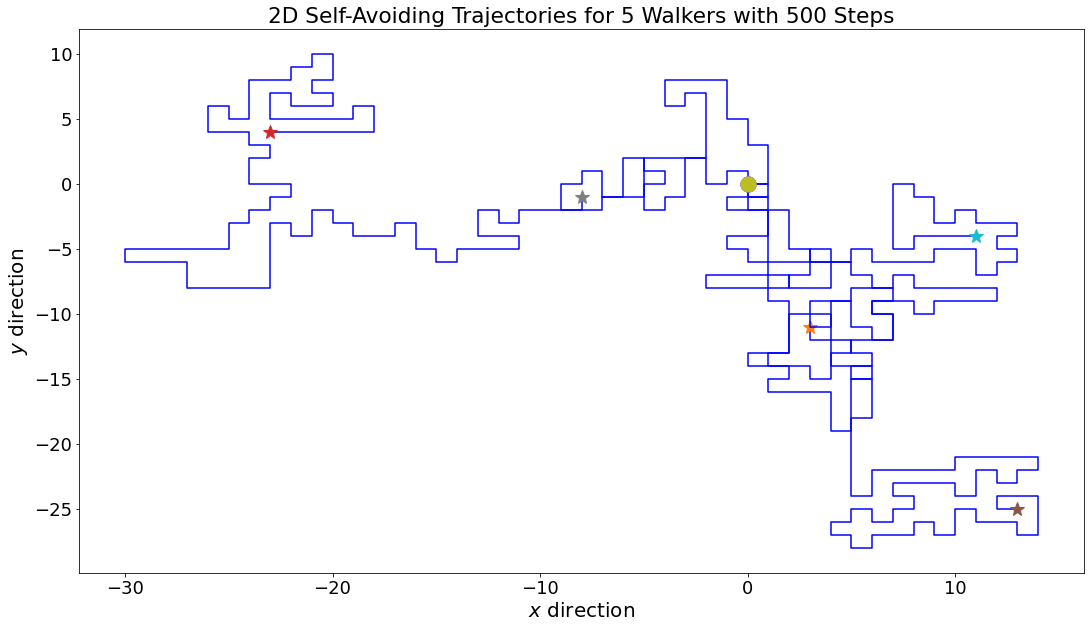

In [7]:
nwalkers = 5
nsteps = 500
walk = SelfAvoidingWalk2D(nwalkers=nwalkers, nsteps = nsteps)

plt.subplots(figsize=(18, 10))
for _ in range(nwalkers):
    res, _, _ = walk.saw()
    plt.plot(res[:,0], res[:,1], color = 'b')
    plt.plot([0], [0], marker = 'o', markersize = 15)
    plt.plot([res[-1,0]], [res[-1,1]], marker = '*', markersize = 15)

plt.xlabel(r'$x$ direction', fontsize = 20)
plt.ylabel(r'$y$ direction', fontsize = 20)
plt.title("2D Self-Avoiding Trajectories for {} Walkers with {} Steps".format(nwalkers,nsteps))
plt.savefig('../img/sfig1.png')
plt.savefig('../img/sfig1.pdf')
plt.show()

## 2. Mean-Squared Displacement

In [10]:
walk = SelfAvoidingWalk2D(nwalkers=10000, nsteps = 100)
sigma2x, sigma2y, r2 = walk.monte_carlo()

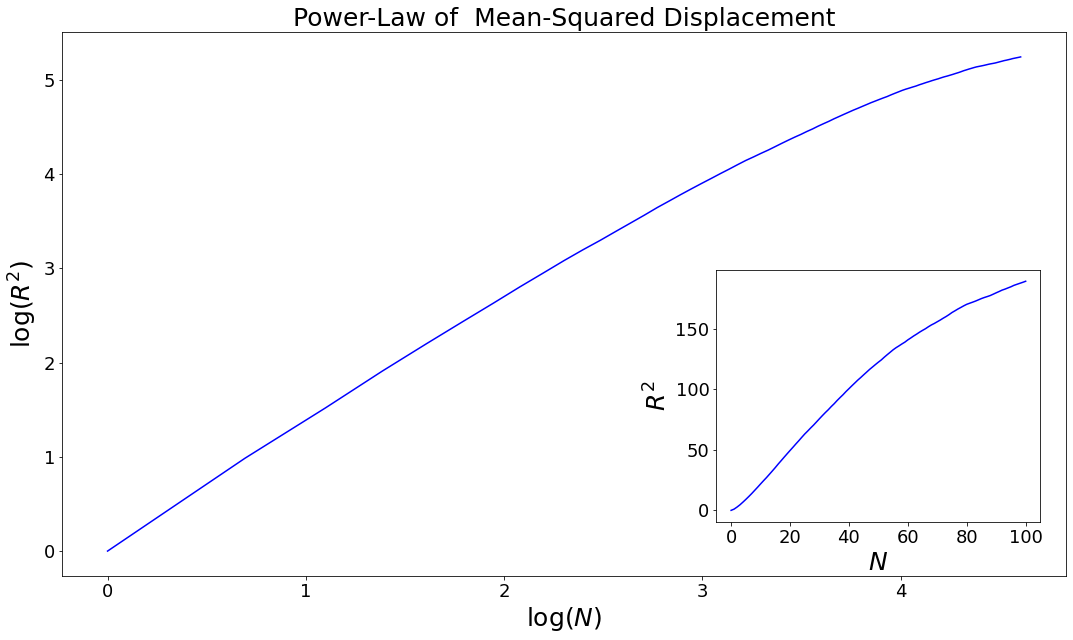

In [11]:
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.63,0.2,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

# plot data
ax1.plot(np.log(np.arange(1, len(r2))), np.log(r2[1:]), color = 'b')
ax2.plot(range(len(r2)), r2, color = 'b')

# extract slope and intercept
mm_, cc_ = np.polyfit(np.log(np.arange(1, len(r2))), np.log(r2[1:]), 1)

# ax1.set_xlim([0,6])
# ax1.set_ylim([0,3])
ax1.set_ylabel(r'log($ R^2$)', fontsize = 25)
ax1.set_xlabel(r'log($N$)', fontsize = 25)
ax1.set_title(r'Power-Law of  Mean-Squared Displacement', fontsize = 25)
# ax1.text(0.1,8.5, r'Assume data obey: $log(\sigma^2) = \beta log(N) + log(\alpha)$', 
#fontsize = 20)
# ax1.text(0.1, 8, 
# r'$\langle S\rangle = \alpha N^{\beta}$, where $\alpha \approx 1$ and $\beta \approx 1$', 
#          fontsize = 20)
ax2.set_ylabel(r'$R^2$', fontsize = 25)
ax2.set_xlabel(r'$N$', fontsize = 25)
plt.savefig('../img/sfig2.png')
plt.savefig('../img/sfig2.pdf')
plt.show()

In [13]:
mm_/2

0.526677297159536